<a href="https://colab.research.google.com/github/Bolla-kaseeswari00/Bolla-kaseeswari00/blob/main/SALARYPREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [36]:
dataset=pd.read_csv(r"Salary.csv")

In [33]:
dataset.shape

(35, 2)

In [32]:
print(len(dataset))

35


In [ ]:
dataset.tail(10)

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872
30,11.2,127345
31,11.5,126756
32,12.3,128765
33,12.9,135675
34,13.5,139465


In [37]:
dataset.head(10)

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


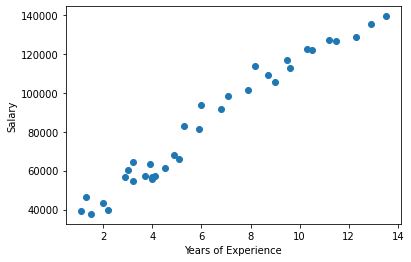

In [39]:
plt.scatter(dataset['YearsExperience'],dataset['Salary'])
plt.xlabel('Years of Experience');
plt.ylabel("Salary");

In [40]:
X = dataset.iloc[:,:-1].values
Y=dataset.iloc[:,-1].values


In [ ]:
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5],
       [11.2],
       [11.5],
       [12.3],
       [12.9],
       [13.5]])

In [ ]:
Y

array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872, 127345, 126756,
       128765, 135675, 139465])

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=1/3,random_state=101)

In [44]:
X_train


array([[ 5.1],
       [ 3.9],
       [ 2. ],
       [ 1.3],
       [ 7.9],
       [ 4. ],
       [ 2.9],
       [ 4.5],
       [ 1.1],
       [ 7.1],
       [ 8.7],
       [ 2.2],
       [ 3.2],
       [ 4.1],
       [ 3.7],
       [ 4.9],
       [12.9],
       [10.5],
       [ 8.2],
       [ 3. ],
       [ 5.3],
       [ 4. ],
       [11.5]])

In [ ]:
Y_train

array([ 66029,  63218,  43525,  46205, 101302,  56957,  56642,  61111,
        39343,  98273, 109431,  39891,  64445,  57081,  57189,  67938,
       135675, 121872, 113812,  60150,  83088,  55794, 126756])

In [45]:
X_test

array([[ 5.9],
       [ 3.2],
       [ 6.8],
       [13.5],
       [11.2],
       [ 9.5],
       [ 9. ],
       [ 9.6],
       [12.3],
       [ 1.5],
       [10.3],
       [ 6. ]])

In [46]:
Y_test

array([ 81363,  54445,  91738, 139465, 127345, 116969, 105582, 112635,
       128765,  37731, 122391,  93940])

In [47]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()

In [48]:
LR.fit(X_train,Y_train);

In [ ]:
Y_pred_LR=LR.predict(X_test)

In [ ]:
X_test

array([[ 5.9],
       [ 3.2],
       [ 6.8],
       [13.5],
       [11.2],
       [ 9.5],
       [ 9. ],
       [ 9.6],
       [12.3],
       [ 1.5],
       [10.3],
       [ 6. ]])

In [49]:
Y_test

array([ 81363,  54445,  91738, 139465, 127345, 116969, 105582, 112635,
       128765,  37731, 122391,  93940])

In [50]:
Y_pred_LR

array([ 80334.73257059,  56296.48493308,  88347.4817831 , 147997.94814285,
       127520.92237756, 112385.72942061, 107934.20208033, 113276.03488867,
       137314.28252618,  41161.29197613, 119508.17316506,  81225.03803865])

In [51]:
diff_LR=Y_test-Y_pred_LR

In [52]:
res_df=pd.concat([pd.Series(Y_pred_LR),pd.Series(Y_test),pd.Series(diff_LR)],axis=1)
res_df.columns=['Prediction','Original Data','Diff']

In [53]:
res_df

,Prediction,Original Data,Diff
0,80334.732571,81363,1028.267429
1,56296.484933,54445,-1851.484933
2,88347.481783,91738,3390.518217
3,147997.948143,139465,-8532.948143
4,127520.922378,127345,-175.922378
5,112385.729421,116969,4583.270579
6,107934.202080,105582,-2352.202080
7,113276.034889,112635,-641.034889
8,137314.282526,128765,-8549.282526
9,41161.291976,37731,-3430.291976


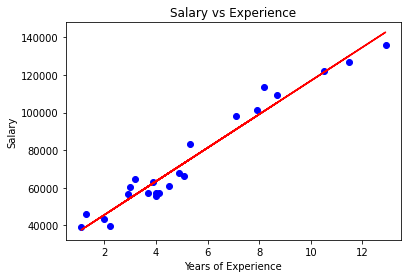

In [54]:
plt.scatter(X_train,Y_train,color='blue')
plt.plot(X_train,LR.predict(X_train),color='red')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel("Salary")
plt.savefig(r'D:\Python37\Years of Experience.png')
plt.show()

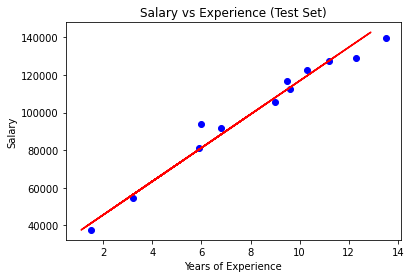

In [55]:
plt.scatter(X_test,Y_test,color='blue')
plt.plot(X_train,LR.predict(X_train),color='red')
plt.title('Salary vs Experience (Test Set)')
plt.xlabel('Years of Experience')
plt.ylabel("Salary")
plt.show()

In [56]:
from sklearn import metrics
rmse= np.sqrt(metrics.mean_squared_error(Y_test,Y_pred_LR))
Accuracy=metrics.r2_score(Y_test,Y_pred_LR)

In [57]:
rmse

5557.362454336018

In [58]:
Accuracy

0.9647205677131959

In [59]:
LR.predict([[17]])

array([179158.63952482])

In [60]:
from sklearn.tree import DecisionTreeRegressor

In [61]:
DT=DecisionTreeRegressor()

In [62]:
DT.fit(X_train,Y_train);

In [63]:
Y_pred_dt=DT.predict(X_test)

In [64]:
Y_pred_dt

array([ 83088.,  64445.,  98273., 135675., 126756., 109431., 109431.,
       121872., 135675.,  46205., 121872.,  83088.])

In [65]:
Y_test

array([ 81363,  54445,  91738, 139465, 127345, 116969, 105582, 112635,
       128765,  37731, 122391,  93940])

In [66]:
diff_DT=Y_test-Y_pred_dt

In [67]:
res_dt=pd.concat([pd.Series(Y_pred_dt),pd.Series(Y_test),pd.Series(diff_DT)],axis=1)
res_dt.columns=['Prediction','Original Data','Diff']

In [68]:
res_dt

,Prediction,Original Data,Diff
0,83088.0,81363,-1725.0
1,64445.0,54445,-10000.0
2,98273.0,91738,-6535.0
3,135675.0,139465,3790.0
4,126756.0,127345,589.0
5,109431.0,116969,7538.0
6,109431.0,105582,-3849.0
7,121872.0,112635,-9237.0
8,135675.0,128765,-6910.0
9,46205.0,37731,-8474.0


In [69]:
X_test

array([[ 5.9],
       [ 3.2],
       [ 6.8],
       [13.5],
       [11.2],
       [ 9.5],
       [ 9. ],
       [ 9.6],
       [12.3],
       [ 1.5],
       [10.3],
       [ 6. ]])

In [70]:
from sklearn import metrics
rmse= np.sqrt(metrics.mean_squared_error(Y_test,Y_pred_dt))
R2=metrics.r2_score(Y_test,Y_pred_dt)

In [71]:
rmse

6800.388015890466

In [72]:
R2

0.9471735375034349

In [73]:
from sklearn import tree

In [74]:
text_representation=tree.export_text(DT);
print(text_representation);

|--- feature_0 <= 6.20
|   |--- feature_0 <= 2.55
|   |   |--- feature_0 <= 1.20
|   |   |   |--- value: [39343.00]
|   |   |--- feature_0 >  1.20
|   |   |   |--- feature_0 <= 2.10
|   |   |   |   |--- feature_0 <= 1.65
|   |   |   |   |   |--- value: [46205.00]
|   |   |   |   |--- feature_0 >  1.65
|   |   |   |   |   |--- value: [43525.00]
|   |   |   |--- feature_0 >  2.10
|   |   |   |   |--- value: [39891.00]
|   |--- feature_0 >  2.55
|   |   |--- feature_0 <= 5.20
|   |   |   |--- feature_0 <= 4.70
|   |   |   |   |--- feature_0 <= 3.95
|   |   |   |   |   |--- feature_0 <= 2.95
|   |   |   |   |   |   |--- value: [56642.00]
|   |   |   |   |   |--- feature_0 >  2.95
|   |   |   |   |   |   |--- feature_0 <= 3.80
|   |   |   |   |   |   |   |--- feature_0 <= 3.45
|   |   |   |   |   |   |   |   |--- feature_0 <= 3.10
|   |   |   |   |   |   |   |   |   |--- value: [60150.00]
|   |   |   |   |   |   |   |   |--- feature_0 >  3.10
|   |   |   |   |   |   |   |   |   |--- value: 

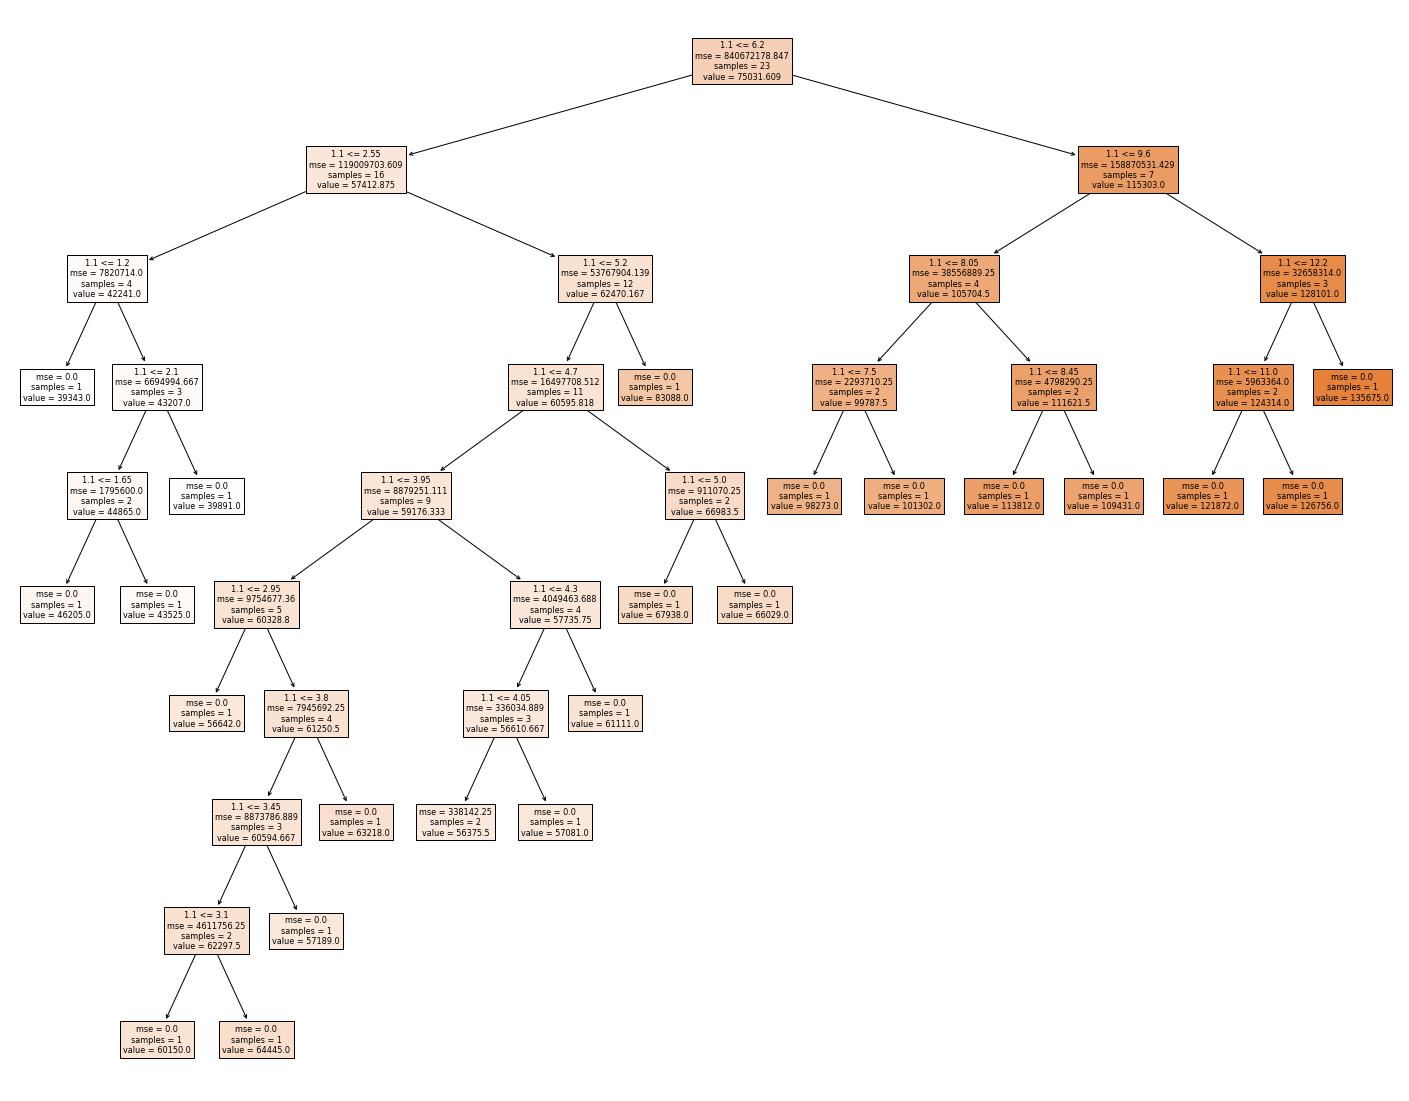

In [75]:
fig=plt.figure(figsize=(25,20))
_=tree.plot_tree(DT,feature_names=dataset['YearsExperience'],filled=True)